In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import copy
import pickle
from torchvision import transforms

from get3d_utils import constructGenerator, eval_get3d_angles, generate_rotate_camera_list, save_textured_mesh

In [2]:
def preprocess_rgb(array):
    img = array
    img = transforms.Normalize(mean=[-1.0, -1.0, -1.0], std=[2.0, 2.0, 2.0])(img)
    img = img.transpose(1, 3)
    img = img.transpose(1, 2)
    img = img.clip(0., 1.)
    return img.cpu()

In [3]:
with open('test.pickle', 'rb') as f:
        generator_args = pickle.load(f)

G_ema = constructGenerator(**generator_args)

constructing
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
==> resume from pretrained path pretrained_model/shapenet_car.pt


In [4]:
torch.manual_seed(0)

In [5]:

#loss_types = ['pae']
samples_n = 60
loss_type = 'pae'
edited_state = torch.load(f'generators_saved/12_cameras_Sports Car_pae_generator.pt')

In [6]:
import copy

original_state_dict = copy.deepcopy(G_ema.state_dict())

In [7]:
n_samples = 30

z_geo = torch.randn(n_samples, 512).to('cuda')
z_tex = torch.randn(n_samples, 512).to('cuda')

with torch.no_grad():
    ws_geo = G_ema.mapping_geo(z_geo, c=torch.ones(1, device='cuda'), truncation_psi=0.7, update_emas=False)
    ws_tex = G_ema.mapping(z_tex, c=torch.ones(1, device='cuda'), truncation_psi=0.7, update_emas=False)

In [8]:
# Saving Meshes

with torch.no_grad():
    # G_ema.load_state_dict(original_state_dict)
    # for i, _ in enumerate(ws_geo):
    #     img_original = eval_get3d_angles(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), cameras=cameras, intermediate_space=True).cpu()
    #     save_textured_mesh(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), f'ablation/camera_nums/1/pae/{i}.obj')
    G_ema.load_state_dict(edited_state)
    for i, _ in enumerate(ws_geo):
        save_textured_mesh(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), f'extra_meshes/12_cameras_pae/{i}.obj')
    torch.cuda.empty_cache()

In [ ]:
# Rendering Images

with torch.no_grad():
    camera_idxs = [0, 4, 8, 12, 16]
    cameras = generate_rotate_camera_list()
    cameras = [camera for i, camera in enumerate(cameras) if i in camera_idxs]
    imgs_original = []
    imgs_edited = []
    G_ema.load_state_dict(original_state_dict)
    for i, _ in enumerate(ws_geo):
        img_original = eval_get3d_angles(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), cameras=cameras, intermediate_space=True).cpu()
        imgs_original.append(img_original)
    G_ema.load_state_dict(edited_state)
    for i, _ in enumerate(ws_geo):
        img_edited = eval_get3d_angles(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), cameras=cameras, intermediate_space=True).cpu()
        imgs_edited.append(img_edited)
    torch.cuda.empty_cache()

/home/windows-ssh/git/GET3D/get3d_utils.py:351: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  camera_theta = torch.range(0, n_camera - 1, device='cuda').unsqueeze(dim=-1) / n_camera * math.pi * 2.0


In [ ]:
# Saving Meshes

with torch.no_grad():
    # G_ema.load_state_dict(original_state_dict)
    # for i, _ in enumerate(ws_geo):
    #     img_original = eval_get3d_angles(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), cameras=cameras, intermediate_space=True).cpu()
    #     save_textured_mesh(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), f'ablation/camera_nums/1/pae/{i}.obj')
    G_ema.load_state_dict(edited_state)
    for i, _ in enumerate(ws_geo):
        save_textured_mesh(G_ema, ws_geo[i].unsqueeze(0).clone(), ws_tex[i].unsqueeze(0).clone(), f'ablation/camera_nums/{n_cameras}/{loss_type}/{i}.obj')
    torch.cuda.empty_cache()

In [ ]:
imgs_original = torch.cat(imgs_original)
imgs_edited = torch.cat(imgs_edited)

In [10]:
import torch.nn.functional as F
imgs_original_processed = preprocess_rgb(imgs_original).transpose(2, 3).transpose(1, 2)
imgs_edited_processed = preprocess_rgb(imgs_edited).transpose(2, 3).transpose(1, 2)

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
n_cameras = 3
with open(f'weight_transform_7_cameras_Bugatti_pae_train_val_loss.pickle', 'rb') as f:
    loss_dict = pickle.load(f)

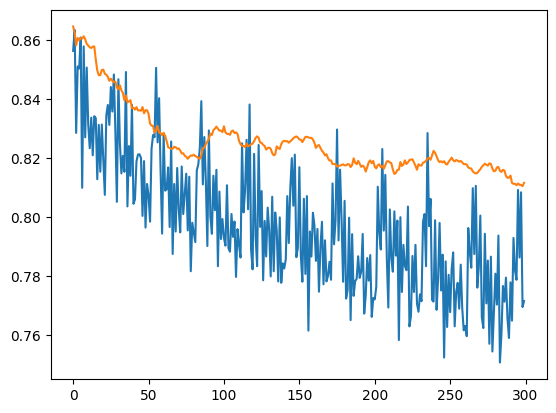

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')

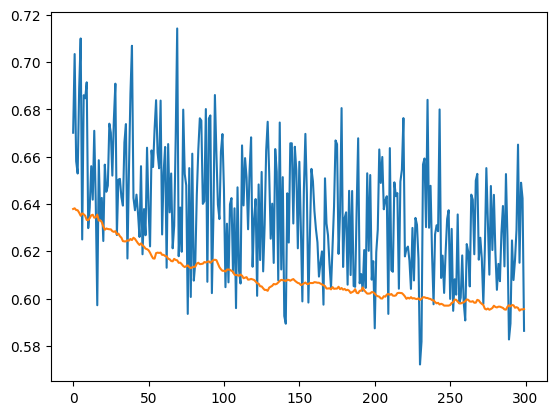

In [2]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')

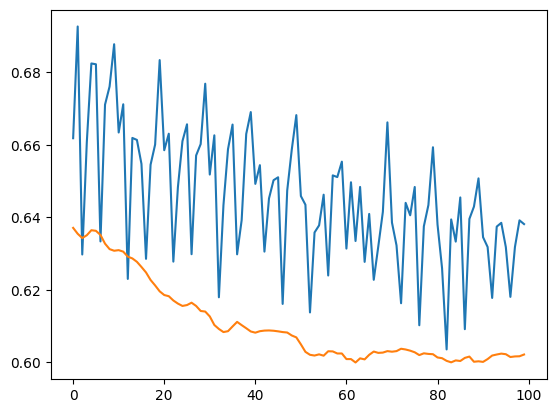

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')

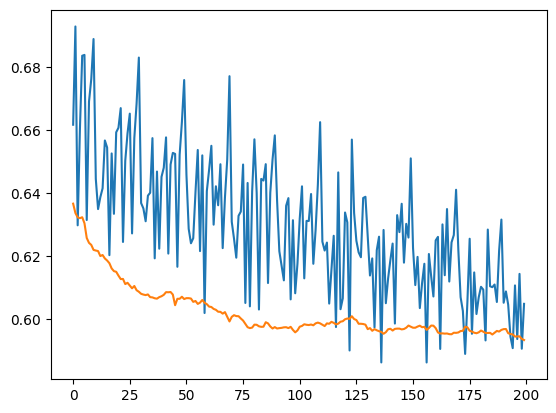

In [2]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')

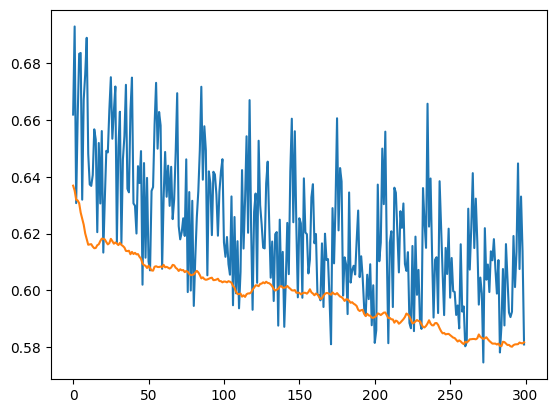

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')

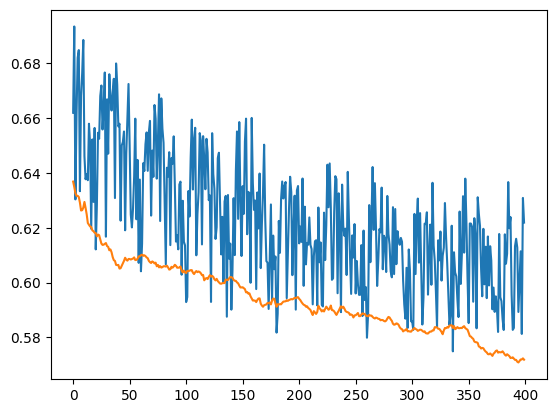

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(loss_dict['train']), label='Training Loss')
ax.plot(np.array(loss_dict['val']), label='Validation Loss')